In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_rows', 500)

In [22]:
df = pd.read_csv("/content/Unicorns in april 2022s end.csv", sep=",")

# Replace "Artificial intelligence" in Industry with "Artificial Intelligence"
df["Industry"].replace("Artificial intelligence", "Artificial Intelligence", inplace = True)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.30,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


# 1) Number of Unicorn Start-ups that joined each year
- The number of startup grew exponentially from 2020 to 2021

In [3]:
# Extract Year from Date joined column
df["Date Joined"] = pd.to_datetime(df["Date Joined"])
df["Year Joined"] = df["Date Joined"].dt.year

# Group by each "Year Joined" to get the count of unicorn start-ups that joined by year | use reset_index to get groupby in dataframe
startup_by_year = df.groupby(by=["Year Joined"])['Company'].count().reset_index(name='Count')

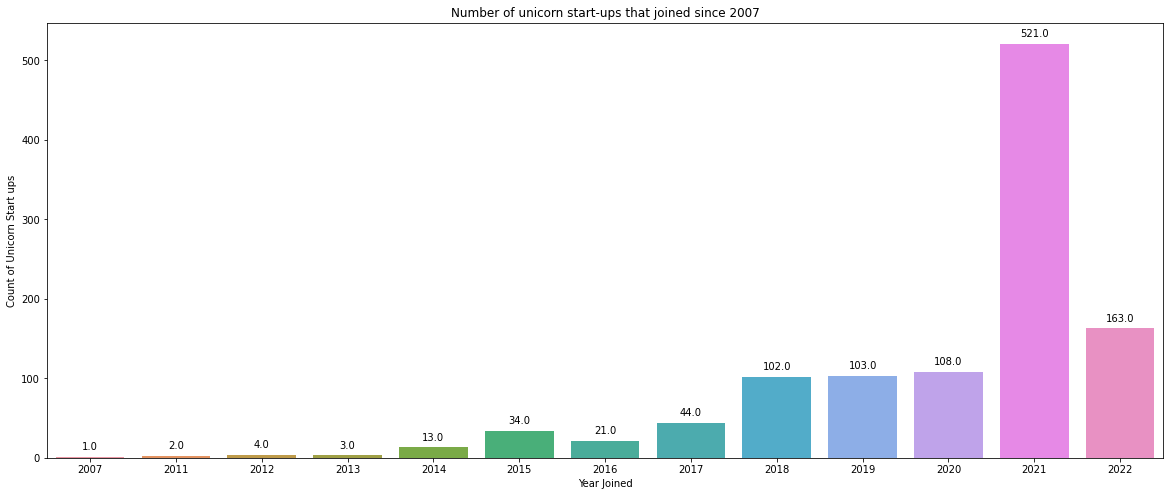

In [4]:
plt.figure(figsize=(20,8))
chart = sns.barplot(x=startup_by_year['Year Joined'], y=startup_by_year['Count'])
plt.ylabel("Count of Unicorn Start ups")
plt.title("Number of unicorn start-ups that joined since 2007")

for p in chart.patches:
    chart.annotate(f'{p.get_height():0}', (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# 2) Countries with the highest number of unicorn start-ups (at least more than 10 start-ups)

Text(0.5, 1.0, 'Count of unicorn start-ups in each countries')

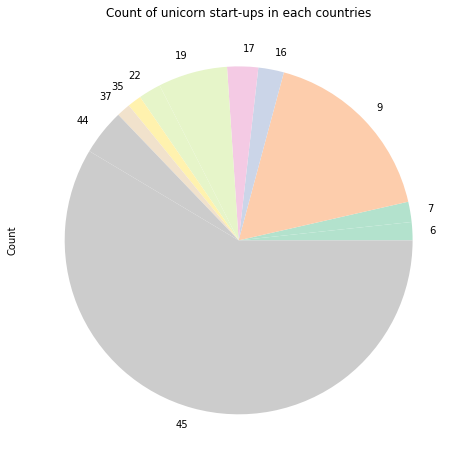

In [ ]:
startup_by_country = df.groupby(by=["Country"])['Company'].count().reset_index(name="Count")
startup_by_country = startup_by_country[startup_by_country["Count"] > 10]

startup_by_country["Count"].plot(kind='pie', x='Country', cmap='Pastel2', figsize=(14,8))
plt.title("Count of unicorn start-ups in each countries")

# 3) Number of unicorn startups over the year for top 4 countries

In [5]:
startup_by_country_year = df.groupby(by=["Year Joined","Country"])['Company'].count().reset_index(name='Count')
# Choose top 4 countries with more than 40 unicorn start-ups
startup_by_country_year = startup_by_country_year.loc[startup_by_country_year['Country'].isin(["United States","China",
                                                                                               "India","United Kingdom"])]

In [ ]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(17,8))
# sns.lineplot(x='Year Joined', y='Count', hue='Country', data=startup_by_country_year)

In [8]:

fig = px.line(startup_by_country_year, x="Year Joined", y="Count", color='Country', line_dash = 'Country',
              title="Top 4 Countries Unicorn Startups over the years")
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

# 3) Top Valuation Unicorn start-ups for each industry

In [23]:
df[["$","Valuation ($B)"]] = df["Valuation ($B)"].str.split('$',1, expand=True)
df["Valuation ($B)"] = df["Valuation ($B)"].astype(float)

In [24]:
startup_by_industry = df.groupby(by=['Industry'])['Company'].count().reset_index(name='Count')
startup_by_industry = startup_by_industry[startup_by_industry.Count > 1] 

# Subset the industries
df_industries = df.loc[df["Industry"].isin(startup_by_industry["Industry"])]
df_industries.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,$
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",
4,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",


In [44]:
df_industry_max_value = df_industries.groupby(['Industry'])["Valuation ($B)"].max().reset_index(name="Valuation")
top_startups_industry = df_industries.loc[df_industries["Valuation ($B)"].isin(df_industry_max_value["Valuation"])].reset_index(drop=True)
top_startups_industry

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,$
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",
5,Checkout.com,40.0,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",
6,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",
7,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",
8,BYJU's,22.0,7/25/2017,India,Bengaluru,Edtech,"Tencent Holdings, Lightspeed India Partners, S...",
9,DJI Innovations,15.0,1/23/2015,China,Shenzhen,Hardware,"Accel Partners, Sequoia Capital",


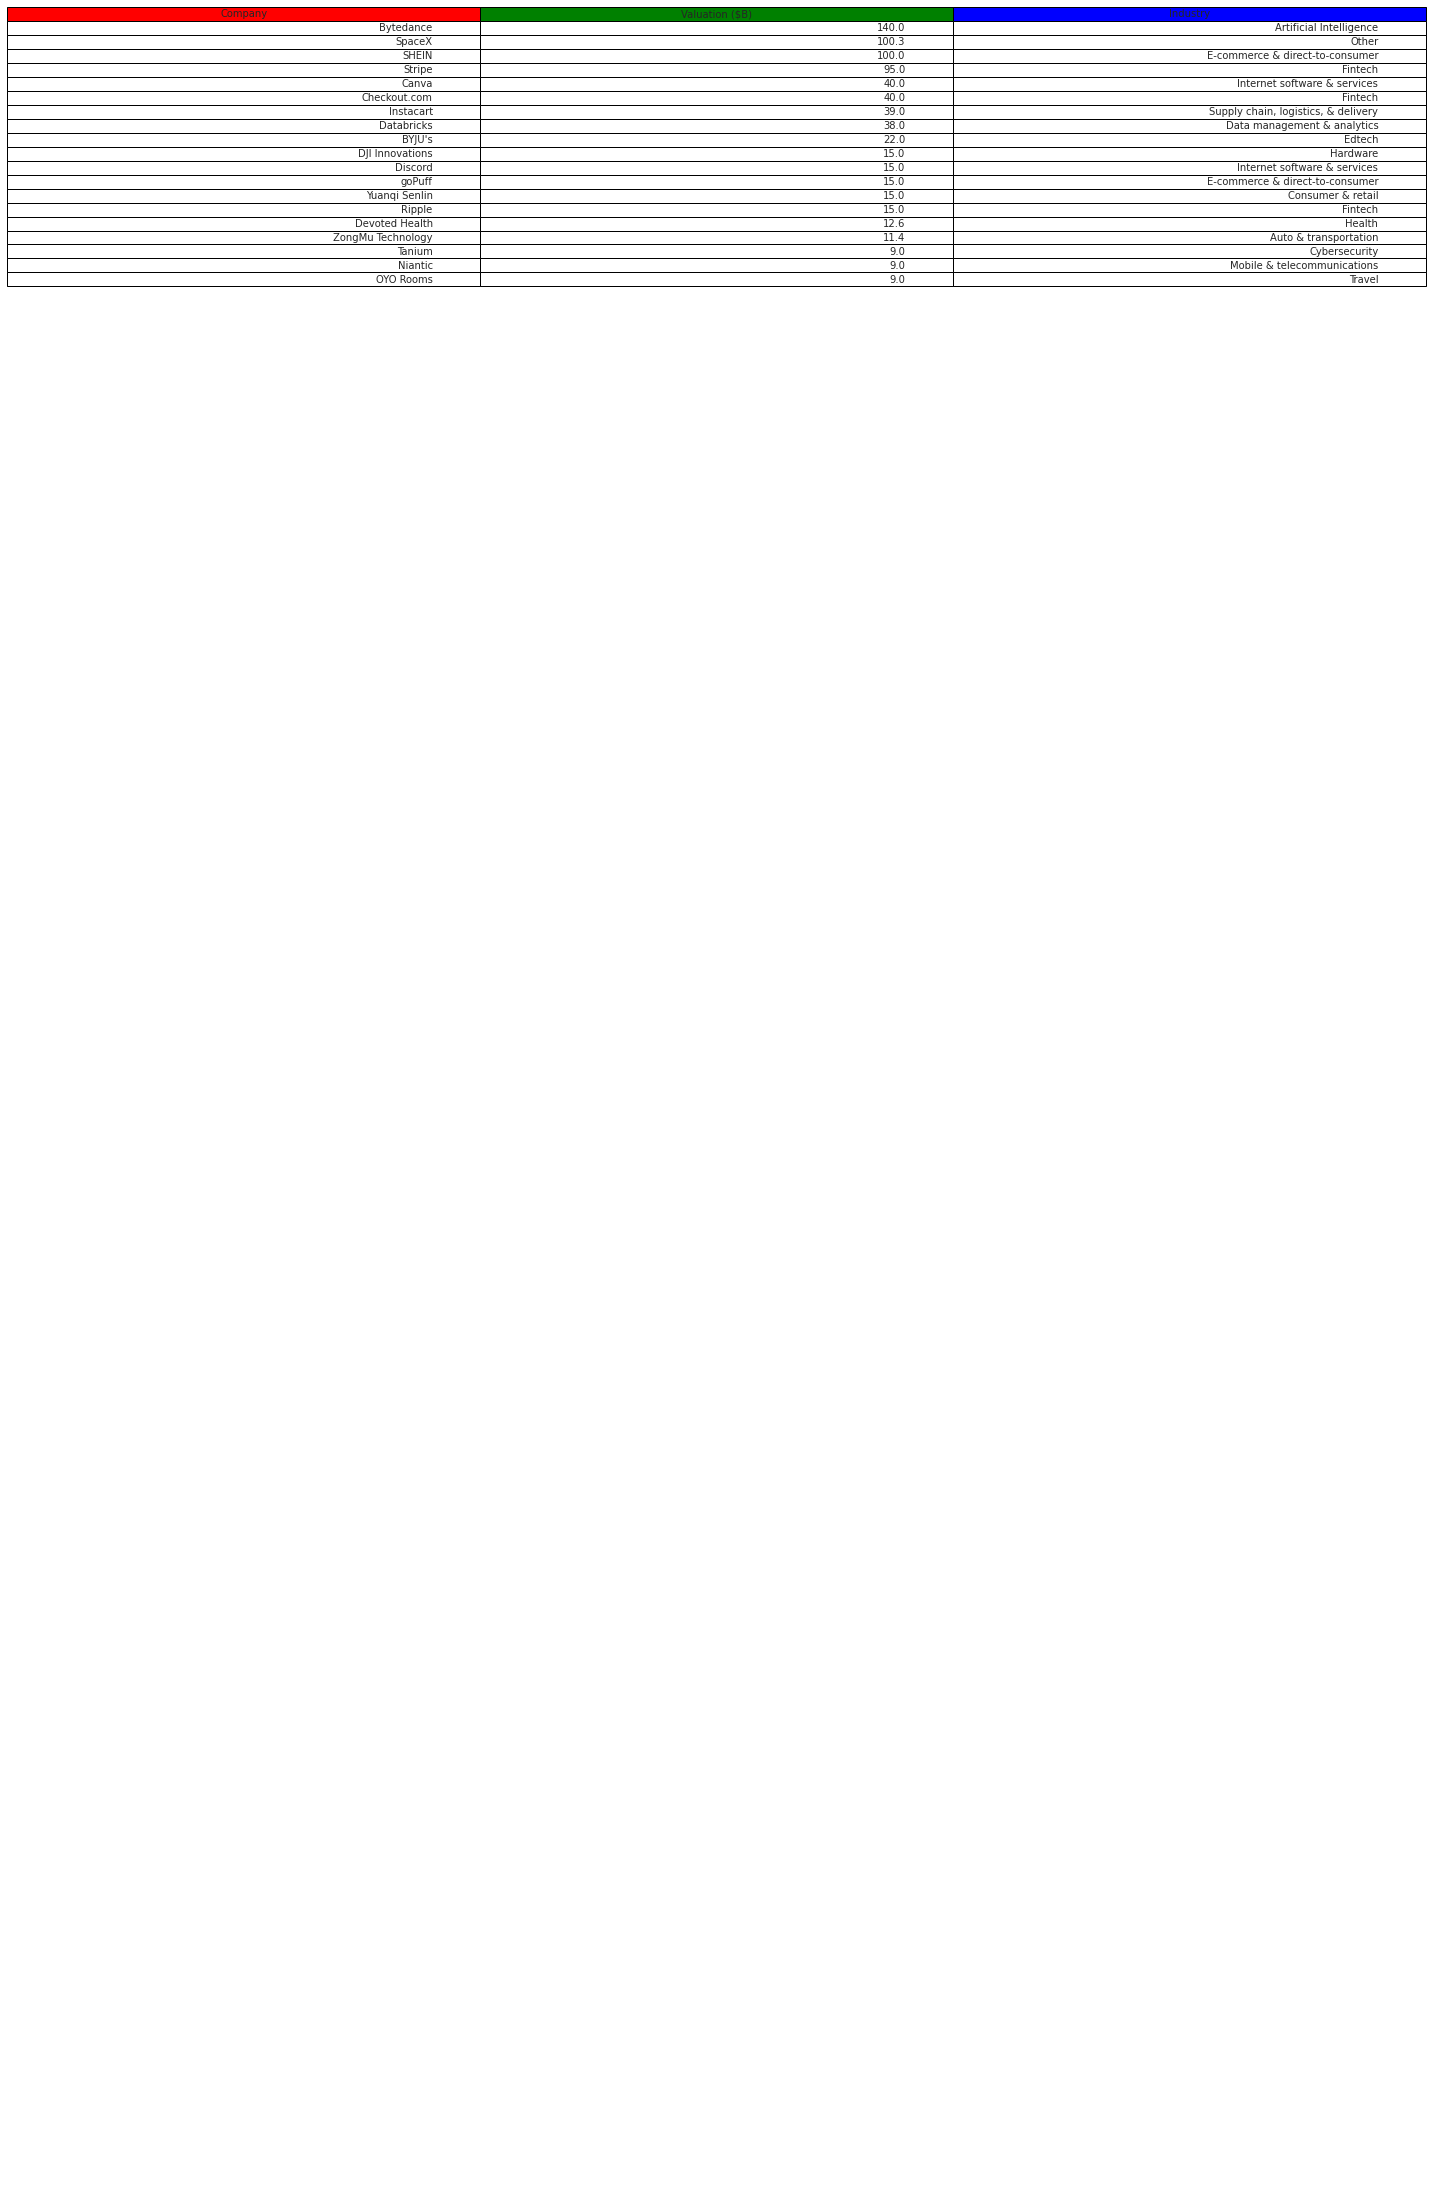

In [71]:
top_startups = top_startups_industry[["Company","Valuation ($B)","Industry"]]
plt.figure(figsize=(20,30))
plt.axis('off')
plt.grid('off')
table = plt.table(cellText= top_startups.values,colLabels = top_startups.columns, loc='top', colColours=["Red","Green","Blue"])
plt.tight_layout()

plt.show()